In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


# weather_data = pd.read_csv(r'D:/CSU/Winter 2021/CSC510 - Foundations of Artificial Intelligence/Portfolio Project/Data/simplemaps_uszips_basicv1.79/climate_data_for_US/combined_climate_data_1980_2021.csv', index_col=0)

In [19]:
weather_data

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,lat,lng,city,state_name
time,,,,,,,,,,,,,,
2006-01-01,-0.4,-1.0,0.0,NaN,NaN,66.0,17.9,NaN,NaN,NaN,42.98223,-97.19354,Volin,South Dakota
2006-01-02,-1.2,-1.0,0.0,NaN,NaN,NaN,14.0,NaN,NaN,NaN,42.98223,-97.19354,Volin,South Dakota
2006-01-03,-0.1,-1.0,2.0,NaN,NaN,144.3,16.3,NaN,NaN,NaN,42.98223,-97.19354,Volin,South Dakota
2006-01-04,2.1,1.0,5.0,NaN,NaN,296.7,25.1,NaN,NaN,NaN,42.98223,-97.19354,Volin,South Dakota
2006-01-05,-1.8,-1.0,1.0,NaN,NaN,NaN,17.6,NaN,NaN,NaN,42.98223,-97.19354,Volin,South Dakota
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,27.5,26.1,30.0,0.0,0.0,59.6,22.0,NaN,1013.0,NaN,15.18887,145.75356,Saipan,Northern Mariana Islands
2021-12-28,27.2,25.0,30.0,0.0,0.0,49.6,24.5,NaN,1013.5,NaN,15.18887,145.75356,Saipan,Northern Mariana Islands
2021-12-29,27.8,25.6,30.6,0.3,0.0,68.8,26.6,NaN,1013.2,NaN,15.18887,145.75356,Saipan,Northern Mariana Islands


In [40]:
weather_data_num_variables = weather_data[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun', 'snow']]

weather_data_num_variables

,tavg,tmin,tmax,prcp,wdir,wspd,wpgt,pres,tsun,snow
time,,,,,,,,,,
2006-01-01,-0.4,-1.0,0.0,NaN,66.0,17.9,NaN,NaN,NaN,NaN
2006-01-02,-1.2,-1.0,0.0,NaN,NaN,14.0,NaN,NaN,NaN,NaN
2006-01-03,-0.1,-1.0,2.0,NaN,144.3,16.3,NaN,NaN,NaN,NaN
2006-01-04,2.1,1.0,5.0,NaN,296.7,25.1,NaN,NaN,NaN,NaN
2006-01-05,-1.8,-1.0,1.0,NaN,NaN,17.6,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,27.5,26.1,30.0,0.0,59.6,22.0,NaN,1013.0,NaN,0.0
2021-12-28,27.2,25.0,30.0,0.0,49.6,24.5,NaN,1013.5,NaN,0.0
2021-12-29,27.8,25.6,30.6,0.3,68.8,26.6,NaN,1013.2,NaN,0.0


In [41]:
# find the mean for each column and replace the NaN's using the fillna() method
# then check the results using the isna() and sum() methods

for column in weather_data_num_variables.columns:
    weather_data_num_variables[column] = weather_data_num_variables[column].fillna(round(weather_data_num_variables[column].mean(), 2))

weather_data_num_variables.isna().sum()

C:\Users\danny\AppData\Local\Temp/ipykernel_9432/943630123.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_num_variables[column] = weather_data_num_variables[column].fillna(round(weather_data_num_variables[column].mean(), 2))


tavg    0
tmin    0
tmax    0
prcp    0
wdir    0
wspd    0
wpgt    0
pres    0
tsun    0
snow    0
dtype: int64

In [42]:
'''
    the wind speed column is in degrees. For models to make use of the wspd columns, we'll need to convert it to a vector 
'''

wv = weather_data_num_variables.pop('wspd')

# Convert to radians.
wd_rad = weather_data_num_variables.pop('wdir')*np.pi / 180

# Calculate the wind x and y components.
weather_data_num_variables['Wdirx'] = wv*np.cos(wd_rad)
weather_data_num_variables['Wdiry'] = wv*np.sin(wd_rad)

C:\Users\danny\AppData\Local\Temp/ipykernel_9432/860879653.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_num_variables['Wdirx'] = wv*np.cos(wd_rad)
C:\Users\danny\AppData\Local\Temp/ipykernel_9432/860879653.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_num_variables['Wdiry'] = wv*np.sin(wd_rad)


In [43]:
weather_data_num_variables

,tavg,tmin,tmax,prcp,wpgt,pres,tsun,snow,Wdirx,Wdiry
time,,,,,,,,,,
2006-01-01,-0.4,-1.0,0.0,2.54,37.6,1016.72,376.76,12.1,7.280586,16.352464
2006-01-02,-1.2,-1.0,0.0,2.54,37.6,1016.72,376.76,12.1,-13.747422,-2.647336
2006-01-03,-0.1,-1.0,2.0,2.54,37.6,1016.72,376.76,12.1,-13.236961,9.511722
2006-01-04,2.1,1.0,5.0,2.54,37.6,1016.72,376.76,12.1,11.277907,-22.423622
2006-01-05,-1.8,-1.0,1.0,2.54,37.6,1016.72,376.76,12.1,-17.282473,-3.328080
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,27.5,26.1,30.0,0.00,37.6,1013.00,376.76,0.0,11.132743,18.975301
2021-12-28,27.2,25.0,30.0,0.00,37.6,1013.50,376.76,0.0,15.878938,18.657689
2021-12-29,27.8,25.6,30.6,0.30,37.6,1013.20,376.76,0.0,9.619214,24.799813


In [44]:
# we need to change the values of the snow column to 1 - signifying it did snow, 
# or a 0 - signifying it din't snow

weather_data_num_variables['snow'] =  np.where(weather_data_num_variables['snow'] > 0, 1, 0)

weather_data_num_variables

C:\Users\danny\AppData\Local\Temp/ipykernel_9432/3566021629.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_num_variables['snow'] =  np.where(weather_data_num_variables['snow'] > 0, 1, 0)


,tavg,tmin,tmax,prcp,wpgt,pres,tsun,snow,Wdirx,Wdiry
time,,,,,,,,,,
2006-01-01,-0.4,-1.0,0.0,2.54,37.6,1016.72,376.76,1,7.280586,16.352464
2006-01-02,-1.2,-1.0,0.0,2.54,37.6,1016.72,376.76,1,-13.747422,-2.647336
2006-01-03,-0.1,-1.0,2.0,2.54,37.6,1016.72,376.76,1,-13.236961,9.511722
2006-01-04,2.1,1.0,5.0,2.54,37.6,1016.72,376.76,1,11.277907,-22.423622
2006-01-05,-1.8,-1.0,1.0,2.54,37.6,1016.72,376.76,1,-17.282473,-3.328080
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,27.5,26.1,30.0,0.00,37.6,1013.00,376.76,0,11.132743,18.975301
2021-12-28,27.2,25.0,30.0,0.00,37.6,1013.50,376.76,0,15.878938,18.657689
2021-12-29,27.8,25.6,30.6,0.30,37.6,1013.20,376.76,0,9.619214,24.799813


<AxesSubplot:>

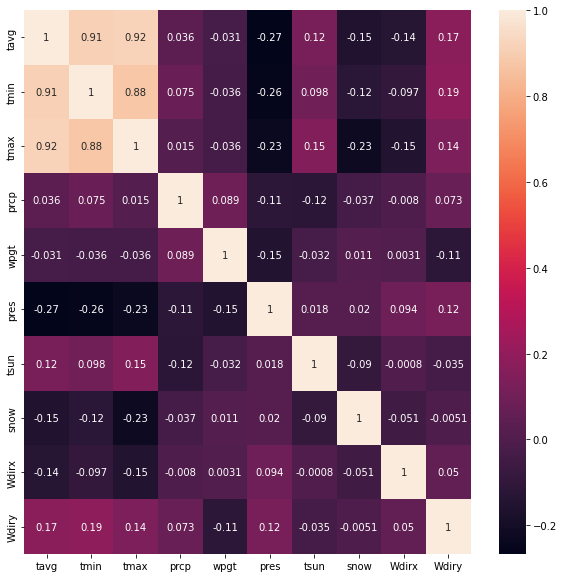

In [45]:
plt.figure(figsize=(10, 10))
sns.heatmap(weather_data_num_variables.corr(),annot=True)

In [46]:
# split the independent and dependent variables
y = weather_data_num_variables.pop('snow')
X = weather_data_num_variables

In [47]:
# split the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [83]:
X_train.shape

(15674906, 9)

In [70]:
# assign default RandomForestClassifier 
clf=RandomForestClassifier(n_estimators=12, max_depth=12 ,verbose=3)

In [66]:
# fit train data to model
clf.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 30


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   38.9s remaining:    0.0s


building tree 2 of 30


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.3min remaining:    0.0s


building tree 3 of 30
building tree 4 of 30
building tree 5 of 30
building tree 6 of 30
building tree 7 of 30
building tree 8 of 30
building tree 9 of 30
building tree 10 of 30
building tree 11 of 30
building tree 12 of 30
building tree 13 of 30
building tree 14 of 30
building tree 15 of 30
building tree 16 of 30
building tree 17 of 30
building tree 18 of 30
building tree 19 of 30
building tree 20 of 30
building tree 21 of 30
building tree 22 of 30
building tree 23 of 30
building tree 24 of 30
building tree 25 of 30
building tree 26 of 30
building tree 27 of 30
building tree 28 of 30
building tree 29 of 30
building tree 30 of 30


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 19.1min finished


RandomForestClassifier(max_depth=12, n_estimators=30, verbose=3)

In [67]:
#Prediction on test data
pred=clf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   24.9s finished


In [76]:
X_train.shape

(15674906, 9)

In [68]:
# Printing confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))

[[2795490  378300]
 [ 812194 2731834]]


In [69]:
#Classification report
from sklearn import metrics
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82   3173790
           1       0.88      0.77      0.82   3544028

    accuracy                           0.82   6717818
   macro avg       0.83      0.83      0.82   6717818
weighted avg       0.83      0.82      0.82   6717818



In [71]:
# save the model

import joblib
# save
joblib.dump(clf, "E:/CSU/Winter 2021/CSC510 - Foundations of Artificial Intelligence/Portfolio Project/Code/random_forest_snow_prediction30.joblib")

# load
# loaded_rf = joblib.load("random_forest_snow_prediction.joblib")


['E:/CSU/Winter 2021/CSC510 - Foundations of Artificial Intelligence/Portfolio Project/Code/random_forest_snow_prediction30.joblib']